In [52]:
from astropy.table import Table
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
mcmc_w51e = '/home/t.yoo/job/mcmc_w51e.fits'
mcmc_w51n = '/home/t.yoo/job/mcmc_w51n.fits'
photometrydir = '/home/t.yoo/w51/catalogue/photometry/'
w51e_b3_flux = photometrydir+'w51e_b3_flux_size.fits'
w51n_b3_flux = photometrydir+'w51n_b3_flux_size.fits'
w51e_b6_flux = photometrydir+'w51e_b6_flux_size.fits'
w51n_b6_flux = photometrydir+'w51n_b6_flux_size.fits'
w51e_b6_conv_flux = photometrydir+'w51e_b6_conv_flux_size.fits'
w51n_b6_conv_flux = photometrydir+'w51n_b6_conv_flux_size.fits'

def flux_gaussian_multiple_apertures(flux, major, minor, rarr): # major, minor in FWHM, au unit
    flux_rescaled = flux*major/minor # making a 2d symmetric Gaussian with FWHM = FWHM_major
    major_sigma = major/np.sqrt(8*np.log(2))
    peak_height = flux / 2 / np.pi/ major/ minor * 8 * np.log(2)
    flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))
    return flux_rarr

class mcmc_result():
    def __init__(self, filename):
        tab = Table.read(filename, format='fits')
        
        self.rthick_med = tab['rthick_med']
        self.T1_med = tab['t1_med']
        self.T2_med = tab['t2_med']
        self.logrho0_med = tab['logrho0_med']
        self.alpha_med = tab['alpha_med']

        
        self.opt_thinthick_med = tab['opt_thinthick_med']
        self.opt_thinthick_upp = tab['opt_thinthick_upp']
        self.opt_thinthick_low = tab['opt_thinthick_low']
        
        self.opt_thin_med = tab['opt_thin_med']
        self.opt_thin_upp = tab['opt_thin_upp']
        self.opt_thin_low = tab['opt_thin_low']
        
        self.opt_thick_med = tab['opt_thick_med']
        self.opt_thick_upp = tab['opt_thick_upp']
        self.opt_thick_low = tab['opt_thick_low']
        
        self.opt_thinthick_upperr = tab['opt_thinthick_upp'] - tab['opt_thinthick_med']
        self.opt_thin_upperr = tab['opt_thin_upp'] - tab['opt_thin_med']
        self.opt_thick_upperr = tab['opt_thick_upp'] - tab['opt_thick_med']
       
        self.opt_thinthick_lowerr = tab['opt_thinthick_med'] - tab['opt_thinthick_low']
        self.opt_thin_lowerr = tab['opt_thin_med'] - tab['opt_thin_low']
        self.opt_thick_lowerr = tab['opt_thick_med'] - tab['opt_thick_low']
        
        self.opt_thin_err= np.array(list(zip(tab['opt_thin_med'] - tab['opt_thin_low'], tab['opt_thin_upp'] - tab['opt_thin_med']))).T
        self.opt_thick_err= np.array(list(zip(tab['opt_thick_med'] - tab['opt_thick_low'], tab['opt_thick_upp'] - tab['opt_thick_med']))).T
        self.opt_thinthick_err= np.array(list(zip(tab['opt_thinthick_med'] - tab['opt_thinthick_low'], tab['opt_thinthick_upp'] - tab['opt_thinthick_med']))).T

        self.envelop_mass_med = tab['fluxmass_med']
        self.envelop_mass_upp = tab['fluxmass_upp']
        self.envelop_mass_low = tab['fluxmass_low']
        self.envelop_mass_err= np.array(list(zip(tab['fluxmass_med'] - tab['fluxmass_low'], tab['fluxmass_upp'] - tab['fluxmass_med']))).T

        self.lum_med = tab['lum_med']
        self.lum_upp = tab['lum_upp']
        self.lum_low = tab['lum_low']



mcmc_result_w51e = mcmc_result(mcmc_w51e)
mcmc_result_w51n = mcmc_result(mcmc_w51n)


plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
mpl.rcParams['axes.linewidth'] = 5
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
params = {"xtick.top": True, "ytick.right": True, "xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)




/scratch/local/24194812/ipykernel_928097/3911331607.py:55: UserWarning: Warning: converting a masked element to nan.
  self.opt_thin_err= np.array(list(zip(tab['opt_thin_med'] - tab['opt_thin_low'], tab['opt_thin_upp'] - tab['opt_thin_med']))).T
/scratch/local/24194812/ipykernel_928097/3911331607.py:56: UserWarning: Warning: converting a masked element to nan.
  self.opt_thick_err= np.array(list(zip(tab['opt_thick_med'] - tab['opt_thick_low'], tab['opt_thick_upp'] - tab['opt_thick_med']))).T
/scratch/local/24194812/ipykernel_928097/3911331607.py:57: UserWarning: Warning: converting a masked element to nan.
  self.opt_thinthick_err= np.array(list(zip(tab['opt_thinthick_med'] - tab['opt_thinthick_low'], tab['opt_thinthick_upp'] - tab['opt_thinthick_med']))).T
/scratch/local/24194812/ipykernel_928097/3911331607.py:62: UserWarning: Warning: converting a masked element to nan.
  self.envelop_mass_err= np.array(list(zip(tab['fluxmass_med'] - tab['fluxmass_low'], tab['fluxmass_upp'] - tab['fl

Text(0.5, 0, 'T2 (K)')

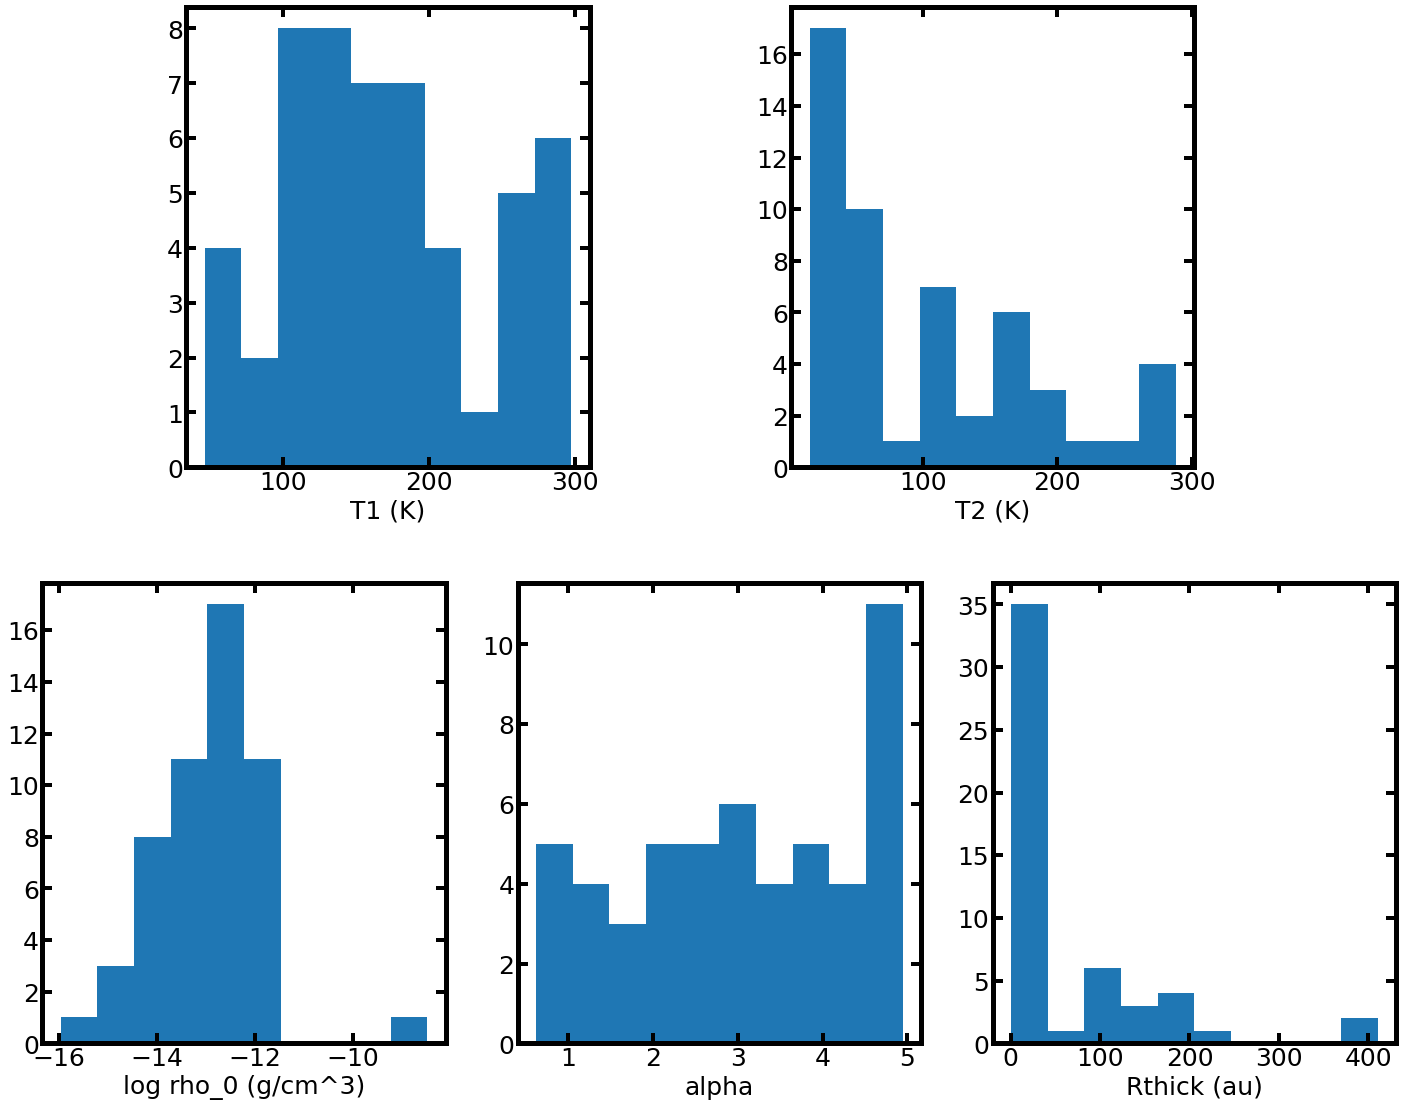

In [54]:
fig = plt.figure(figsize=(20,16))
ax1 = fig.add_axes([0.05,0.05,0.28,0.4])
ax2 = fig.add_axes([0.38,0.05,0.28,0.4])
ax3 = fig.add_axes([0.71,0.05,0.28,0.4])
ax4 = fig.add_axes([0.15,0.55,0.28,0.4])
ax5 = fig.add_axes([0.57,0.55,0.28,0.4])

ax1.hist(mcmc_result_w51e.logrho0_med)
ax2.hist(mcmc_result_w51e.alpha_med)
ax3.hist(mcmc_result_w51e.rthick_med)
ax4.hist(mcmc_result_w51e.T1_med)
ax5.hist(mcmc_result_w51e.T2_med)

ax1.set_xlabel('log rho_0 (g/cm^3)')
ax2.set_xlabel('alpha')
ax3.set_xlabel('Rthick (au)')
ax4.set_xlabel('T1 (K)')
ax5.set_xlabel('T2 (K)')



Text(0.5, 0, 'opt thin mass using T2 only (Msun)')

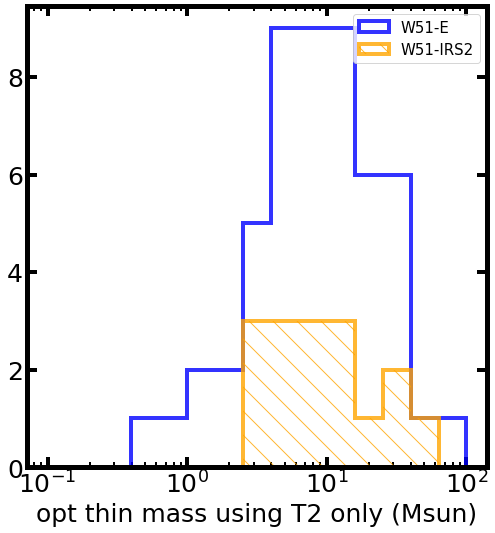

In [50]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
bins = np.logspace(-1,2,16)
ax1.hist(mcmc_result_w51e.envelop_mass_med,bins=bins, histtype='step', color='b',lw=4, alpha=0.8,label='W51-E')
ax1.hist(mcmc_result_w51n.envelop_mass_med,bins=bins, histtype='step', color='orange',lw=4, alpha=0.8,label='W51-IRS2', hatch='\\')
ax1.set_xscale('log')
ax1.legend(fontsize=15)
ax1.set_xlabel('opt thin mass using T2 only (Msun)')

Text(0, 0.5, 'envelope mass (Msun)')

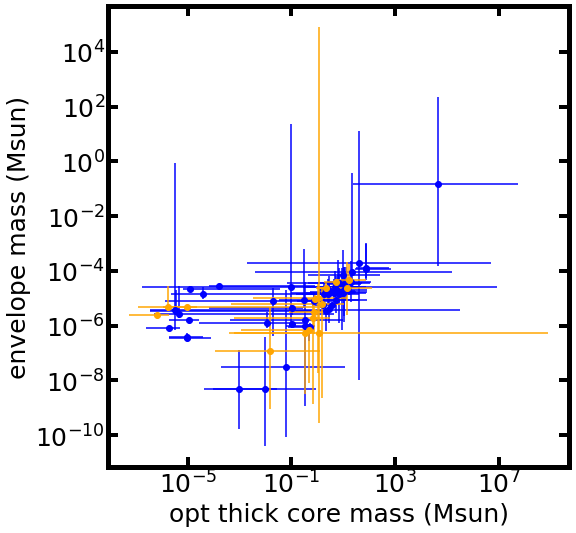

In [38]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.errorbar(mcmc_result_w51e.opt_thick_med, mcmc_result_w51e.opt_thin_med, xerr=mcmc_result_w51e.opt_thick_err, yerr=mcmc_result_w51e.opt_thin_err, fmt='o', color='b',label='W51-E')
ax1.errorbar(mcmc_result_w51n.opt_thick_med, mcmc_result_w51n.opt_thin_med, xerr=mcmc_result_w51n.opt_thick_err, yerr=mcmc_result_w51n.opt_thin_err, fmt='o', color='orange',label='W51-IRS2')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('opt thick core mass (Msun)')
ax1.set_ylabel('envelope mass (Msun)')

Text(0.5, 0, 'luminosity (Lsun)')

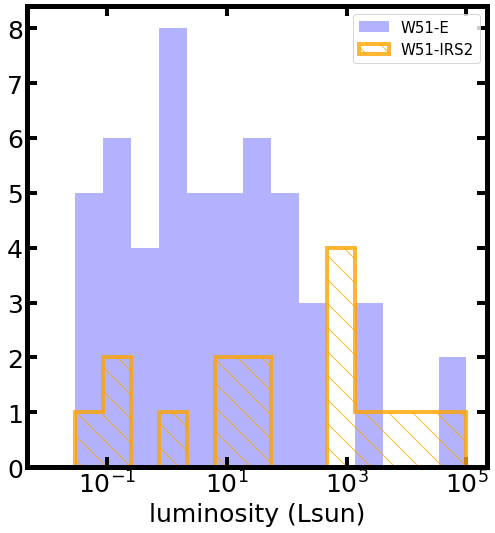

In [39]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
bins = np.logspace(-2,5,16)
ax1.hist(mcmc_result_w51e.lum_med/c.L_sun.to(u.erg/u.s).value,bins=bins , color='b',lw=4, alpha=0.3,label='W51-E')
ax1.hist(mcmc_result_w51n.lum_med/c.L_sun.to(u.erg/u.s).value,bins=bins, histtype='step', color='orange',lw=4, alpha=0.8,label='W51-IRS2', hatch='\\')
ax1.set_xscale('log')
ax1.legend(fontsize=15)
ax1.set_xlabel('luminosity (Lsun)')

/scratch/local/24194812/ipykernel_928097/2927955126.py:18: RuntimeWarning: invalid value encountered in double_scalars
  flux_rescaled = flux*major/minor # making a 2d symmetric Gaussian with FWHM = FWHM_major
/scratch/local/24194812/ipykernel_928097/2927955126.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  peak_height = flux / 2 / np.pi/ major/ minor * 8 * np.log(2)
/scratch/local/24194812/ipykernel_928097/2927955126.py:21: RuntimeWarning: invalid value encountered in double_scalars
  flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))
/scratch/local/24194812/ipykernel_928097/2927955126.py:21: RuntimeWarning: divide by zero encountered in true_divide
  flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))


Text(0, 0.5, 'optically thin masses using only T2 (Msun)')

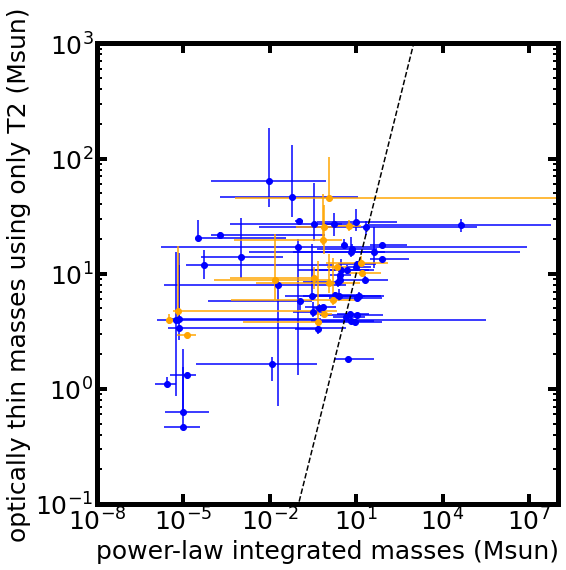

In [49]:
w51e_b3_flux_fits = Table.read(w51e_b3_flux)
w51e_b6_flux_fits = Table.read(w51e_b6_flux)
w51n_b3_flux_fits = Table.read(w51n_b3_flux)
w51n_b6_flux_fits = Table.read(w51n_b6_flux)
w51e_b6_flux_conv_fits = Table.read(w51e_b6_conv_flux)
w51n_b6_flux_conv_fits = Table.read(w51n_b6_conv_flux)
w51e_b3_int_flux = w51e_b3_flux_fits['flux']
w51e_b6_int_flux = w51e_b6_flux_conv_fits['flux']
w51n_b3_int_flux = w51n_b3_flux_fits['flux']
w51n_b6_int_flux = w51n_b6_flux_conv_fits['flux']

w51e_b3_major = w51e_b3_flux_fits['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_major = w51e_b6_flux_fits['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_major = w51n_b3_flux_fits['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_major = w51n_b6_flux_fits['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51e_b3_minor = w51e_b3_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_minor = w51e_b6_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_minor = w51n_b3_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_minor = w51n_b6_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265

w51e_b3_int_fluxerr = w51e_b3_flux_fits['flux_upperr'] - w51e_b3_flux_fits['flux_lowerr']
w51e_b6_int_fluxerr = w51e_b6_flux_conv_fits['flux_upperr'] - w51e_b6_flux_conv_fits['flux_lowerr']
w51n_b3_int_fluxerr = w51n_b3_flux_fits['flux_upperr'] - w51n_b3_flux_fits['flux_lowerr']
w51n_b6_int_fluxerr = w51n_b6_flux_conv_fits['flux_upperr'] - w51n_b6_flux_conv_fits['flux_lowerr']
rarr=np.array([100,200,300,400,500])
flux_b3 = np.array([flux_gaussian_multiple_apertures(w51e_b3_int_flux[i],w51e_b3_major[i], w51e_b3_minor[i], rarr)[-1] for i in range(len(w51e_b3_int_flux))])
flux_b6 = np.array([flux_gaussian_multiple_apertures(w51e_b6_int_flux[i],w51e_b6_major[i], w51e_b6_minor[i], rarr)[-1] for i in range(len(w51e_b3_int_flux))])


fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
w51e_index = np.where((w51e_b3_int_flux>0)&(w51e_b6_int_flux>0)&(np.isfinite(w51e_b3_int_flux))
                      &(np.isfinite(w51e_b6_int_flux))&(w51e_b3_major>0)&(w51e_b6_major>0))
ax1.errorbar(mcmc_result_w51e.opt_thinthick_med,  mcmc_result_w51e.envelop_mass_med, 
             xerr=mcmc_result_w51e.opt_thinthick_err, yerr=mcmc_result_w51e.envelop_mass_err,
             fmt='o', color='b')
ax1.errorbar(mcmc_result_w51n.opt_thinthick_med,  mcmc_result_w51n.envelop_mass_med, 
             xerr=mcmc_result_w51n.opt_thinthick_err, yerr=mcmc_result_w51n.envelop_mass_err,
             fmt='o', color='orange')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot([1e-8,1e8],[1e-8,1e8],ls='dashed',c='k')
ax1.set_ylim(1e-1,1e3)
ax1.set_xlim(1e-8,1e8)
ax1.set_xlabel('power-law integrated masses (Msun)')
ax1.set_ylabel('optically thin masses using only T2 (Msun)')


     flux_lowerr     
          Jy         
---------------------
0.0034233446016682587
   0.2031036015630928
 0.002260382450913573
 0.018151219999221604
 0.004127597633264429
 0.008267026479741285
  0.02468205879466291
 0.012492733256627144
 0.007510819488602472
 0.006059145595784951
 0.009182547118090472
 0.006076865322851594
 0.013355584881845156
0.0028455977589971248
                  ...
 0.009819178013631885
0.0013094945270681752
 0.007594592578552149
 0.027593401893927144
  0.03292239953869171
 0.011959966501072632
 0.002851087347455797
0.0016671567470380026
0.0027931435932045928
  0.00572193920989357
 0.005767852393523688
 0.006887015345579384
0.0026270252692203906
 0.012302080773932914
Length = 61 rows   opt_thinthick_upp  
---------------------
   25.621700473016727
                   --
  0.39960331504342056
   1.7687070588403981
                   --
   0.5036822734777222
    5.309870988235543
    79.75105256319821
   0.4255733797285719
 0.028341343705575284
    532.9505799

/scratch/local/24194812/ipykernel_928097/2052142681.py:18: RuntimeWarning: invalid value encountered in double_scalars
  flux_rescaled = flux*major/minor # making a 2d symmetric Gaussian with FWHM = FWHM_major
/scratch/local/24194812/ipykernel_928097/2052142681.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  peak_height = flux / 2 / np.pi/ major/ minor * 8 * np.log(2)
/scratch/local/24194812/ipykernel_928097/2052142681.py:21: RuntimeWarning: invalid value encountered in double_scalars
  flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))
/scratch/local/24194812/ipykernel_928097/2052142681.py:21: RuntimeWarning: divide by zero encountered in true_divide
  flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))


(1e-07, 100000000.0)

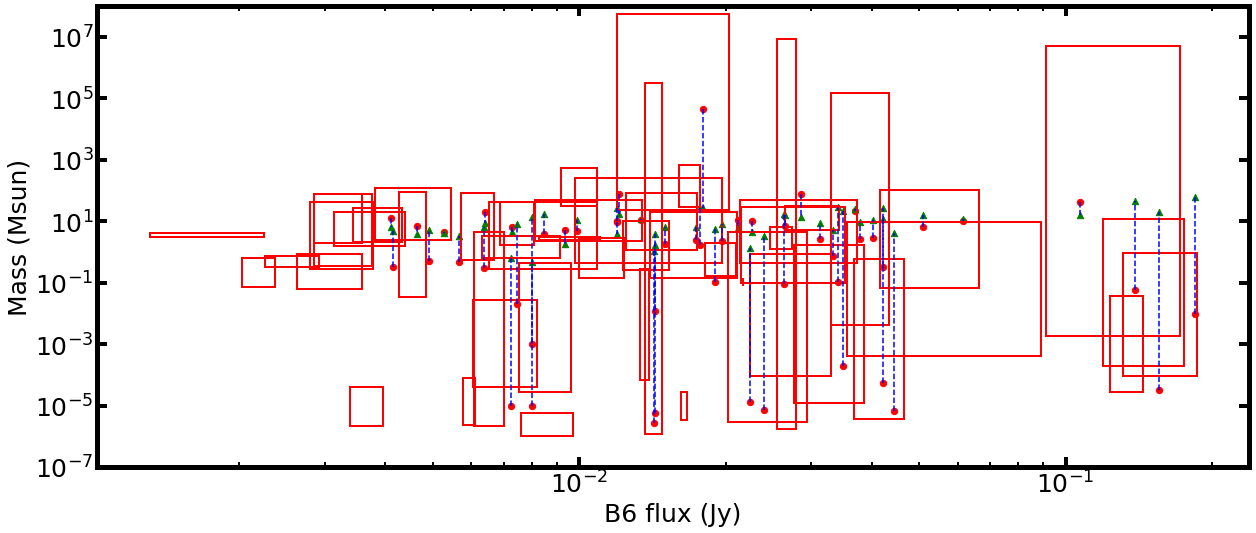

In [34]:

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
w51e_index = np.where((w51e_b3_int_flux>0)&(w51e_b6_int_flux>0)&(np.isfinite(w51e_b3_int_flux))
                      &(np.isfinite(w51e_b6_int_flux))&(w51e_b3_major>0)&(w51e_b6_major>0))
ax1.scatter(flux_b6[w51e_index], mcmc_result_w51e.opt_thinthick_med, marker='o', c='r', s=40)
ax1.scatter(flux_b6[w51e_index], mcmc_result_w51e.envelop_mass_med, marker='^', c='green', s=40)
for i in range(len(w51e_index[0])):
    ax1.plot([flux_b6[w51e_index][i],flux_b6[w51e_index][i]],[mcmc_result_w51e.opt_thinthick_med[i], mcmc_result_w51e.envelop_mass_med[i]], ls='dashed',c='b')
print(flux_b6[w51e_index]-w51e_b6_flux_fits['flux_lowerr'][w51e_index], 
        mcmc_result_w51e.opt_thinthick_upp - mcmc_result_w51e.opt_thinthick_low,
        w51e_b6_int_fluxerr[w51e_index],
        mcmc_result_w51e.opt_thinthick_low)
ax1.bar(flux_b6[w51e_index]-w51e_b6_flux_fits['flux_lowerr'][w51e_index], 
        mcmc_result_w51e.opt_thinthick_upp.value - mcmc_result_w51e.opt_thinthick_low.value,
        width=w51e_b6_int_fluxerr[w51e_index].value,
        bottom=mcmc_result_w51e.opt_thinthick_low.value,
        align='edge',
        edgecolor='r',lw=2,facecolor='none' )
ax1.set_xlabel('B6 flux (Jy)')
ax1.set_ylabel('Mass (Msun)')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1e-7,1e8)


